# Config

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cd /content/drive/MyDrive/EatLab_Project

In [6]:
!zip -r dish_dataset.zip /content/drive/MyDrive/EatLab_Project/AU/Dataset/


Streaming output truncated to the last 5000 lines.
  adding: content/drive/MyDrive/EatLab_Project/AU/Dataset/Classification/dish/empty/AU_APG_2025-01-08_1_frame108900_jpg.rf.744e7403636ad2ce677b0498bb9cda9a_3_2903.jpg (deflated 3%)
  adding: content/drive/MyDrive/EatLab_Project/AU/Dataset/Classification/dish/empty/AU_APG_2025-01-08_1_frame0_jpg.rf.71ef66db52dbb50b10952128296c5e04_3_2842.jpg (deflated 2%)
  adding: content/drive/MyDrive/EatLab_Project/AU/Dataset/Classification/dish/empty/00000002191000000_frame32100_jpg.rf.f25707d15e6427ea133132ca24205f9f_3_2243.jpg (deflated 4%)
  adding: content/drive/MyDrive/EatLab_Project/AU/Dataset/Classification/dish/empty/AU_APG_2025-01-08_1_frame20100_jpg.rf.5e57a79ec6d4dc171499782813706379_3_3088.jpg (deflated 3%)
  adding: content/drive/MyDrive/EatLab_Project/AU/Dataset/Classification/dish/empty/AU_APG_2025-01-08_1_frame32400_jpg.rf.50ab36b68c06f19bb32d11cc8c7ab23c_3_3181.jpg (deflated 2%)
  adding: content/drive/MyDrive/EatLab_Project/AU/Data

In [3]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17496, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 17496 (delta 2), reused 0 (delta 0), pack-reused 17491 (from 3)
Receiving objects: 100% (17496/17496), 16.54 MiB | 16.18 MiB/s, done.
Resolving deltas: 100% (11990/11990), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 103.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:0

# Check data

In [16]:
import os
from collections import Counter

label_dir = "/content/drive/MyDrive/EatLab_Project/AU/Dataset/Detection/train/labels"
class_counts = Counter()

for file in os.listdir(label_dir):
    if file.endswith(".txt"):
        with open(os.path.join(label_dir, file)) as f:
            for line in f:
                class_id = int(line.strip().split()[0])
                class_counts[class_id] += 1

print("Số lượng bounding box theo lớp:")
for k, v in class_counts.items():
    print(f"Class {k}: {v}")

Số lượng bounding box theo lớp:
Class 0: 870
Class 1: 846


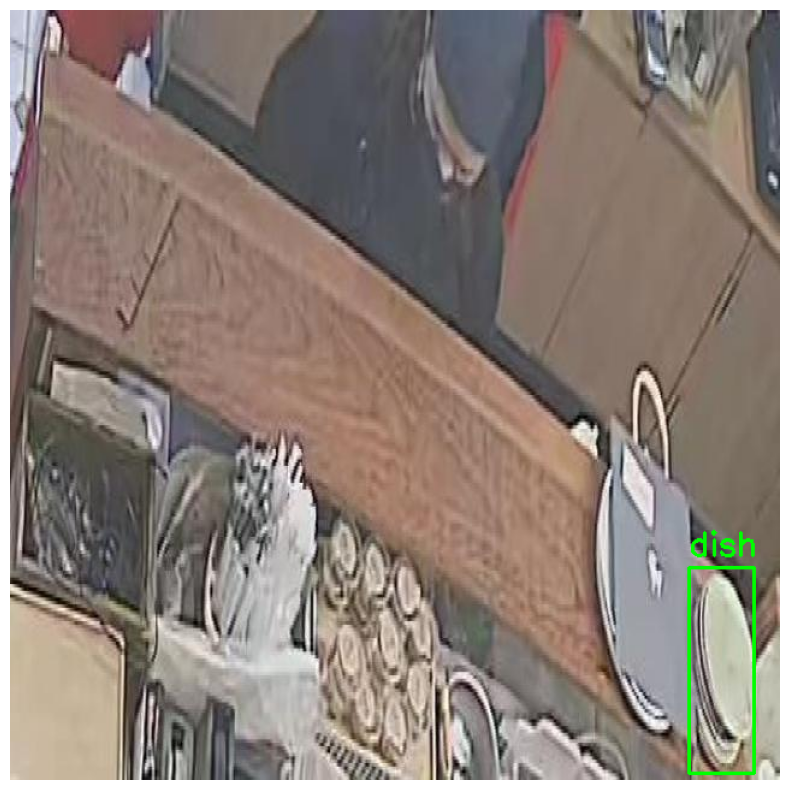

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

image_dir = '/content/drive/MyDrive/EatLab_Project/AU/Dataset/Detection/train/images'
label_dir = '/content/drive/MyDrive/EatLab_Project/AU/Dataset/Detection/train/labels'
class_names = ['dish', 'tray']

def draw_boxes(image_path, label_path):
    image = cv2.imread(image_path)
    h, w = image.shape[:2]

    with open(label_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        parts = line.strip().split()
        class_id = int(parts[0])
        x_center, y_center, width, height = map(float, parts[1:])

        x1 = int((x_center - width / 2) * w)
        y1 = int((y_center - height / 2) * h)
        x2 = int((x_center + width / 2) * w)
        y2 = int((y_center + height / 2) * h)

        color = (0, 255, 0) if class_id == 0 else (255, 0, 0)
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        cv2.putText(image, class_names[class_id], (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

sample_image = 'img_000000.jpg'
draw_boxes(os.path.join(image_dir, sample_image),
           os.path.join(label_dir, sample_image.replace('.jpg', '.txt')))


# Train & Test Detection model

In [5]:
!python train.py \
  --img 1280 \
  --batch 16 \
  --epochs 100 \
  --data /content/drive/MyDrive/EatLab_Project/dataset.yaml \
  --patience 50 \
  --weights yolov5s.pt \
  --device 0 \
  --name detect_dish_tray

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-06-30 10:05:13.860904: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751277913.914382    7095 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751277913.931287    7095 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 3
wandb: You chose "Don't visualize my results"
train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/EatLab_Proje

In [ ]:
!python val.py \
  --weights /content/yolov5/runs/train/detect_dish_tray/weights/best.pt \
  --data /content/drive/MyDrive/EatLab_Project/dataset.yaml \
  --img 640 \
  --task val

val: data=/content/drive/MyDrive/EatLab_Project/dataset.yaml, weights=['/content/yolov5/runs/train/detect_dish_tray/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-421-g79c4c31d Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/drive/.shortcut-targets-by-id/1Ji4RVZveHcBkLngfgH0eexLIWiUp2c78/AU/Dataset/Detection/val/labels... 261 images, 0 backgrounds, 0 corrupt: 100% 261/261 [00:03<00:00, 84.04it/s] 
val: WARNING ⚠️ Cache directory /content/drive/.shortcut-targets-by-id/1Ji4RVZveHcBkLngfgH0eexLIWiUp2c78/AU/Dataset/Detection/val is not writeable: [Errno 30] Read-only file system: '/content/drive/.sh

In [19]:
!python detect.py \
  --weights runs/train/detect_dish_tray2/weights/best.pt \
  --img 640 \
  --conf 0.2 \
  --source "/content/test (1).png"

detect: weights=['runs/train/detect_dish_tray2/weights/best.pt'], source=/content/test (1).png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-421-g79c4c31d Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/test (1).png: 384x640 1 dish, 44.8ms
Speed: 0.6ms pre-process, 44.8ms inference, 176.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp9


# Train & Test Classification model


In [7]:
import torch
from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import os

# Dữ liệu
data_dir = '/content/drive/MyDrive/EatLab_Project/AU/Dataset/Classification/dish'  # 3 folder con: empty, kakigori, non_empty
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])
dataset = datasets.ImageFolder(data_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# ResNet101
model = models.resnet101(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 3)  # 3 classes
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Loss & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:01<00:00, 109MB/s] 


In [8]:
# Train
for epoch in range(10):  # thử 10 epoch
    model.train()
    running_loss = 0
    for images, labels in dataloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss:.4f}")

# Save model
torch.save({'model': model.state_dict()}, 'resnet101.pt')

Epoch 1, Loss: 12.0361
Epoch 2, Loss: 3.2153
Epoch 3, Loss: 2.3959


KeyboardInterrupt: 

In [9]:
torch.save({'model': model.state_dict()}, 'resnet101_stopped.pt')

In [11]:
from google.colab import files
files.download('resnet101_stopped.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
from torchvision import transforms
from PIL import Image
import os

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

class_names = ['empty', 'kakigori', 'non_empty']

In [15]:
img_path = '/content/test_4.jpg'
img = Image.open(img_path).convert('RGB')
img_tensor = transform(img).unsqueeze(0).to(device)

with torch.no_grad():
    output = model(img_tensor)
    pred = torch.argmax(output, dim=1).item()
    print(f'Predicted class: {class_names[pred]}')


Predicted class: empty
